<a href="https://colab.research.google.com/github/SunilKumarSingh84/Keras/blob/main/TF_Keras_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

In [106]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [107]:
print("X shape:", data.data.shape)
print("Y shape:", data.target.shape)
print("Y Names:", data.target_names)
print("X Names:", data.feature_names)

X shape: (569, 30)
Y shape: (569,)
Y Names: ['malignant' 'benign']
X Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [110]:
N, D = X_train.shape
K = 1

i = Input(shape=(D,))
x = Dense(K, activation='sigmoid')(i)

model = Model(inputs=i, outputs=x)

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 31ms/step - loss: 0.7640 - accuracy: 0.4829 - val_loss: 0.6970 - val_accuracy: 0.5798
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.6089 - val_loss: 0.6265 - val_accuracy: 0.6702
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.7060 - val_loss: 0.5666 - val_accuracy: 0.7660
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.7743 - val_loss: 0.5160 - val_accuracy: 0.7979
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.8294 - val_loss: 0.4744 - val_accuracy: 0.8351
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.8556 - val_loss: 0.4400 - val_accuracy: 0.8298
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4596 - accuracy: 0.8635 - val_loss: 0.4108 - val_accuracy: 0.8298
Epoch 8/100


In [111]:
print("Train Score:", model.evaluate(X_train, y_train))
print("Test Score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.9764
Train Score: [0.09484274685382843, 0.9763779640197754]
6/6 [==============================] - 0s 1ms/step - loss: 0.1163 - accuracy: 0.9681
Test Score: [0.11631204932928085, 0.9680851101875305]


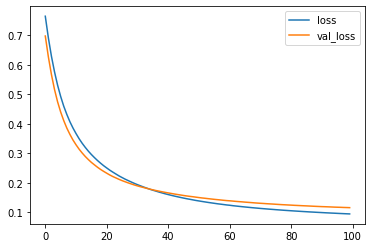

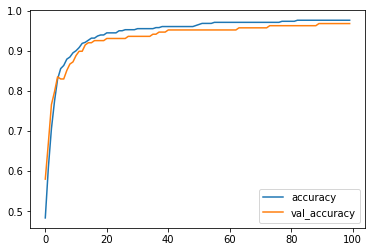

In [112]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()